In [1]:
library(synchrony)
data(pisco.data)
head(pisco.data)
summary(pisco.data)

y=subset(pisco.data,year>2000,select=c(mussel_abund)) # species number
y[y[,1]==0,]=min(y[y[,1]!=0,])/2 # replace 0 to half of the minimum positive number
y=log(y) # take log of the species number

N=subset(pisco.data,year<2003,select=c(mussel_abund)) # (past) species number
#D=coord2dist(pisco.data[1:48,1:2],lower.tri = F) # site distance using lat and lon
D=dist(pisco.data[1:48,1],diag = T,upper = T) # site distance using only (signed) lat
D=as.matrix(D)
for(i in 1:48){
    for(j in 1:48){
        if(i>j){
            D[i,j]=-D[i,j]
        }
    }
}
E=subset(pisco.data,year<2003,select=c(chl,sst,upwelling)) # Environment variable
D=as.matrix(D)
D[1:6,1:6]

# log-likelihood function
logl2=function(t,y,N,D,E){
  n=dim(y)[1]
  f=rep(0,n) # value of the regression function
  yr=rep(0:2,each=48) # 3 years(0-2) used: 00-03 for X, 01-04 for y
  for(j in 1:n){
    # dispersal kernal (for the 48 sites)
    Ker=exp(-(D[j%%48+((j%%48)==0)*48,]-t[2])^2/(t[3]^2)) 
    # number of species for 48 sites
    Nj=N[(yr[j]*48+1):((yr[j]+1)*48),] 
    # dispersal + three environment terms
    f[j]=t[1]+log(sum(Ker*Nj))+t[4]*E[j,1]+t[5]*E[j,2]+t[6]*E[j,3] 
  }
  
  return(sum((y[,1]-f)^2)) # return the objective function
}


# do the optimization to find the parameters
t0=c(1,0,1,0.1,0.1,0.1)
res2=nlm(logl2,t0,hessian=T,print.level=1,y=y,N=N,D=D,E=E,iterlim=1e4,steptol=1e-5)


synchrony 0.2.3 loaded.


latitude longitude       chl      sst upwelling mussel_abund year
1 32.71167 -117.2500 0.8897000 16.51596  85.17711       1.0667 2000
2 32.82000 -117.2767 0.8095000 16.76317  85.17711      46.7000 2000
3 32.84000 -117.2800 0.7844000 16.78249  85.17711      10.6000 2000
4 33.44000 -118.4767 0.5192727 16.48601  70.71932       2.8000 2000
5 33.45000 -118.4800 0.5192727 16.44148  70.71932       0.9333 2000
6 33.46000 -118.5200 0.5017273 16.44452  56.26153       0.4000 2000

    latitude       longitude           chl               sst        
 Min.   :32.71   Min.   :-124.7   Min.   : 0.4091   Min.   : 8.598  
 1st Qu.:34.36   1st Qu.:-124.1   1st Qu.: 1.2910   1st Qu.:10.899  
 Median :38.83   Median :-123.4   Median : 3.0401   Median :11.894  
 Mean   :39.55   Mean   :-122.1   Mean   : 4.2056   Mean   :12.643  
 3rd Qu.:44.37   3rd Qu.:-120.0   3rd Qu.: 7.0753   3rd Qu.:14.664  
 Max.   :48.39   Max.   :-117.2   Max.   :15.0320   Max.   :17.290  
   upwelling       mussel_abund         year     
 Min.   :-57.69   Min.   : 0.000   Min.   :2000  
 1st Qu.:-23.02   1st Qu.: 6.592   1st Qu.:2001  
 Median : 59.26   Median :24.817   Median :2002  
 Mean   : 37.82   Mean   :27.292   Mean   :2002  
 3rd Qu.: 84.36   3rd Qu.:44.008   3rd Qu.:2002  
 Max.   :120.82   Max.   :81.300   Max.   :2003  

1           2           3           4            5           6
1  0.0000000  0.10833359  0.12833405  0.72833252  0.738334656 0.748332977
2 -0.1083336  0.00000000  0.02000046  0.61999893  0.630001068 0.639999390
3 -0.1283340 -0.02000046  0.00000000  0.59999847  0.610000610 0.619998932
4 -0.7283325 -0.61999893 -0.59999847  0.00000000  0.010002136 0.020000458
5 -0.7383347 -0.63000107 -0.61000061 -0.01000214  0.000000000 0.009998322
6 -0.7483330 -0.63999939 -0.61999893 -0.02000046 -0.009998322 0.000000000

iteration = 0
Step:
[1] 0 0 0 0 0 0
Parameter:
[1] 1.0 0.0 1.0 0.1 0.1 0.1
Function Value
[1] 16552.29
Gradient:
[1]   2640.2677    223.2813   2436.9812   7644.3689  35891.0001 187877.4232

iteration = 61
Parameter:
[1]  1.0191051955 -0.0035246753 -0.0106411733  0.0001333653 -0.1045139552
[6]  0.0015669502
Function Value
[1] 106.6706
Gradient:
[1] -1.40124793  0.02515411  0.22112269  0.03462215  0.01106416 -0.54526949

Successive iterates within tolerance.
Current iterate is probably solution.



[1] "The estimated parameters are:"
[1]  1.0191051955 -0.0035246753 -0.0106411733  0.0001333653 -0.1045139552
[6]  0.0015669502
[1] "MSE in log scale is:  0.740768043728402"


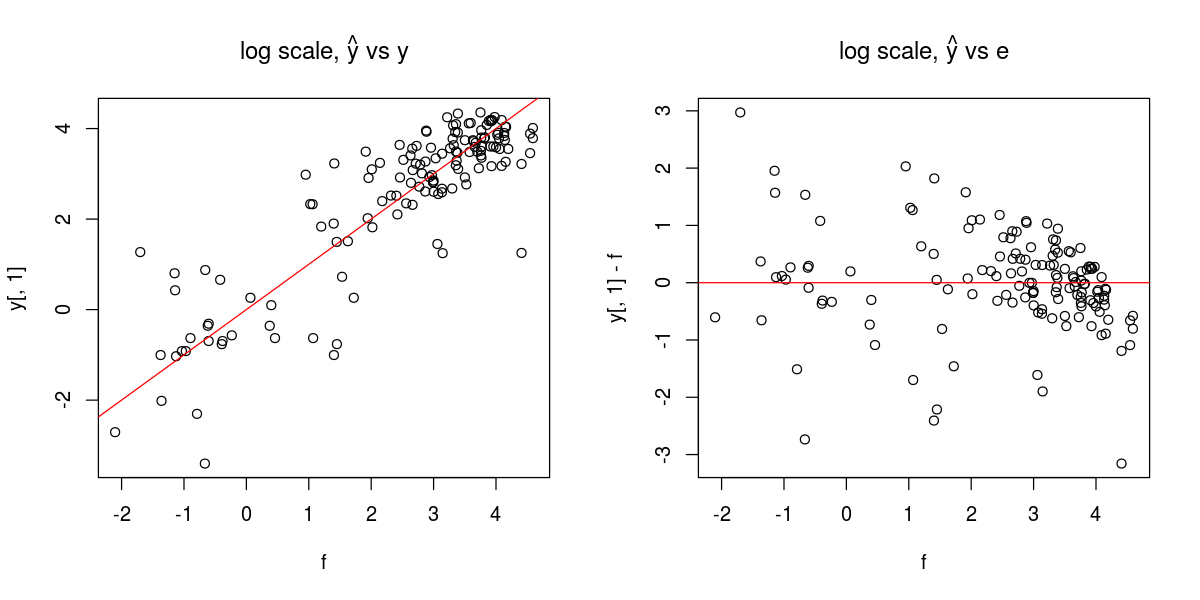

In [3]:
t=res2$estimate
print("The estimated parameters are:")
print(t)
n=dim(y)[1]
  f=rep(0,n) # value of the regression function
  yr=rep(0:2,each=48) # 3 years(0-2) used: 00-03 for X, 01-04 for y
  for(j in 1:n){
    # dispersal kernal (for the 48 sites)
    Ker=exp(-(D[j%%48+((j%%48)==0)*48,]-t[2])^2/(t[3]^2)) 
    # number of species for 48 sites
    Nj=N[(yr[j]*48+1):((yr[j]+1)*48),] 
    # dispersal + three environment terms
    f[j]=t[1]+log(sum(Ker*Nj))+t[4]*E[j,1]+t[5]*E[j,2]+t[6]*E[j,3] 
  }
MSE=mean((y[,1]-f)^2)
print(paste("MSE in log scale is: ",MSE))
par(mfrow=c(1,2))
options(repr.plot.width = 10)
options(repr.plot.height = 5)
plot(f,y[,1],main=expression(paste("log scale, ", hat(y)," vs y")))
abline(a=0,b=1,col=2)
plot(f,y[,1]-f,main=expression(paste("log scale, ", hat(y)," vs e")))
abline(a=0,b=0,col=2)


In [10]:
mu_mle=t[2]

sigma=sd(y[,1]-f)

n=dim(y)[1]
f=rep(0,n) # value of the regression function
fp=rep(0,n)
fpp=rep(0,n)
yr=rep(0:2,each=48) # 3 years(0-2) used: 00-03 for X, 01-04 for y
for(j in 1:n){
    # dispersal kernal (for the 48 sites)
    Ker=exp(-(D[j%%48+((j%%48)==0)*48,]-t[2])^2/(t[3]^2)) 
    # number of species for 48 sites
    Nj=N[(yr[j]*48+1):((yr[j]+1)*48),] 
    # dispersal + three environment terms
    f[j]=t[1]+log(sum(Ker*Nj))+t[4]*E[j,1]+t[5]*E[j,2]+t[6]*E[j,3] 
    #-------------------------------------------------------------
    dmm=D[j%%48+((j%%48)==0)*48,]-t[2]# d_si - mu_d
    
    fp[j]=sum(Nj*Ker*2*dmm/t[3]^2)/sum(Ker*Nj) # f'
    
    Kp=sum(Nj*(Ker*4*dmm^2-Ker*2/t[3]^2)) # derivative of top for f'
    
    kp=sum(Nj*Ker*2*dmm/t[3]^2) # derivative of bottom for f'
    
    fpp[j]=(Kp*sum(Ker*Nj)-kp*sum(Nj*Ker*2*dmm/t[3]^2))/sum(Ker*Nj)^2 # f''
    
}


lpp=sum(-fp-fp^2+(y-f)*fp)/sigma^2

mu_Jn=-lpp

mu_l=1.96/mu_Jn

c(t[2]-mu_l, t[2]+mu_l)

[1] -0.003526705 -0.003522645

In [11]:
t[2]

[1] -0.003524675